## Importing packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing dataset and looking at dataset basic information

In [2]:
df_hitters = pd.read_csv("Hitters.csv")
df_hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
df_hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

**There are 322 observations and 20 variables and most are numerical**

In [4]:
df_hitters.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

**There are 59 null values for Salary**

In [5]:
df_hitters.isnull().sum().sum()

59

<Axes: >

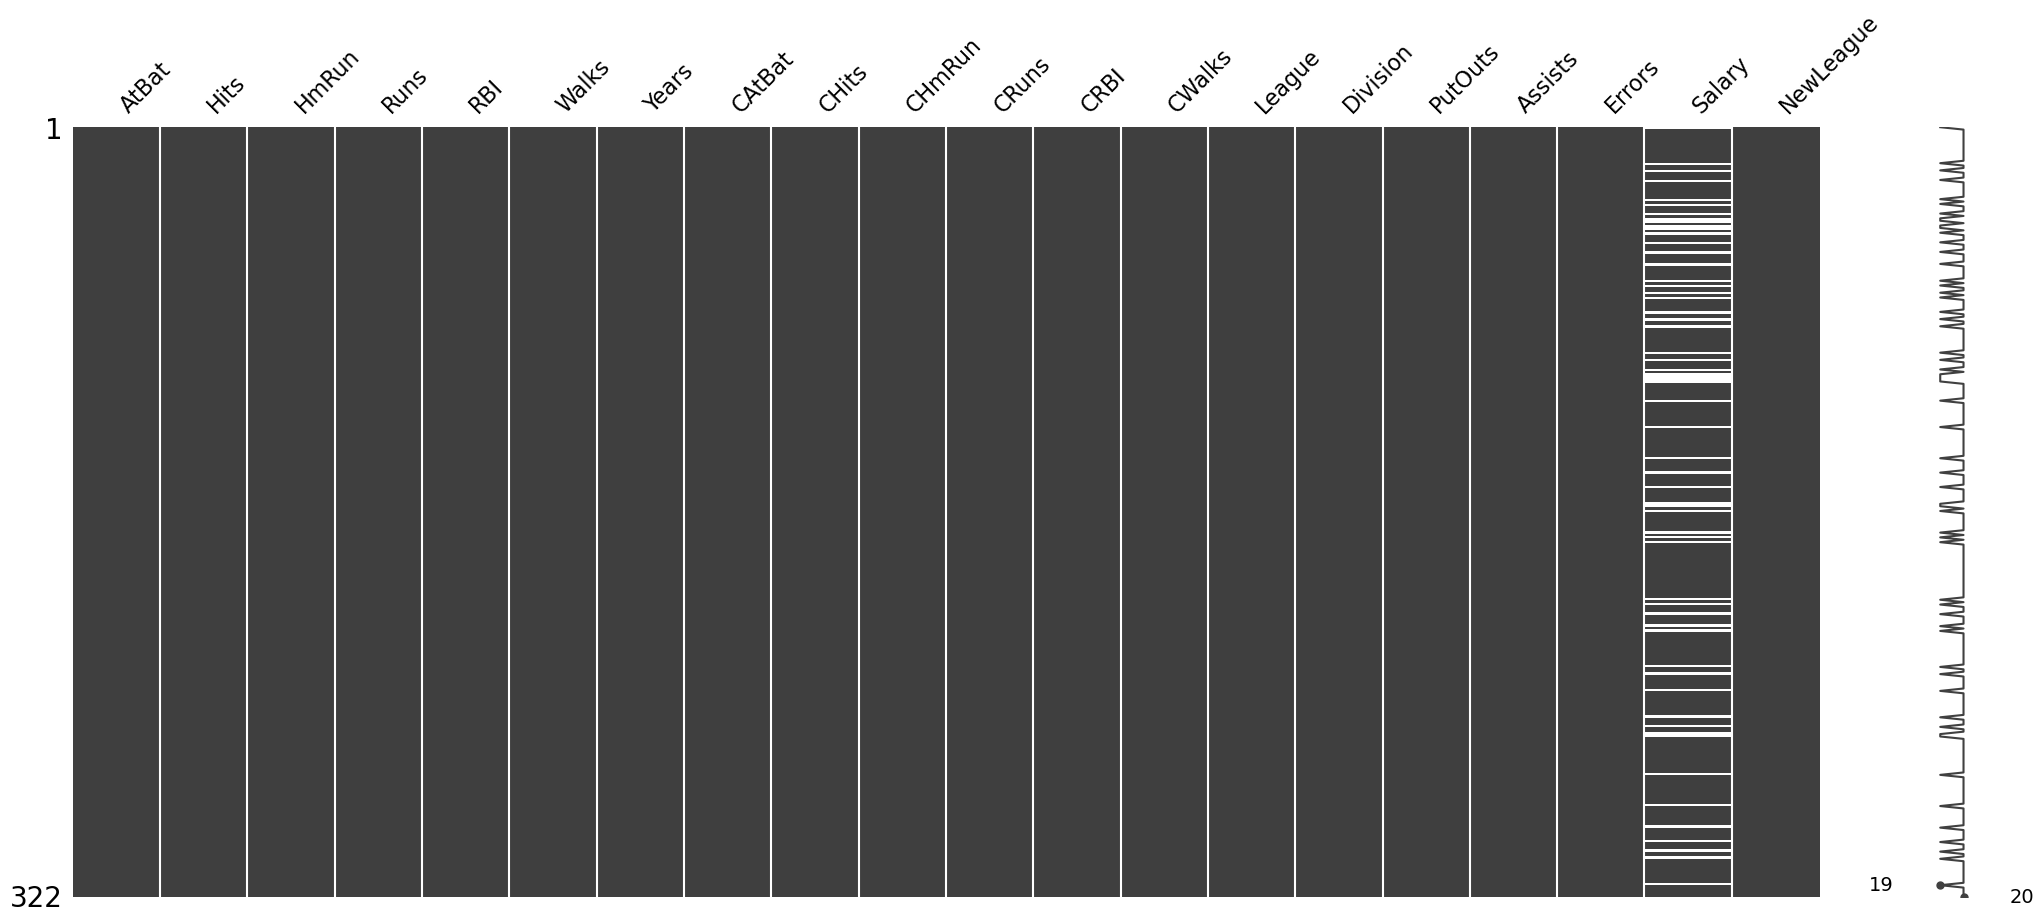

In [6]:
msno.matrix(df_hitters)

**From the matrix we can see that the only column with missing values is salary. Also there is no obvious pattern in the missing values.**

## Data Visualization

### Creating a countplot of the categorical variables in the dataset and explaining the observation

In [7]:
categorical_vars = df_hitters.select_dtypes(include =["object","category"]).columns
categorical_vars

Index(['League', 'Division', 'NewLeague'], dtype='object')

In [8]:
cat_vars = df_hitters.select_dtypes(include =["object","category"])
cat_vars.nunique()

League       2
Division     2
NewLeague    2
dtype: int64

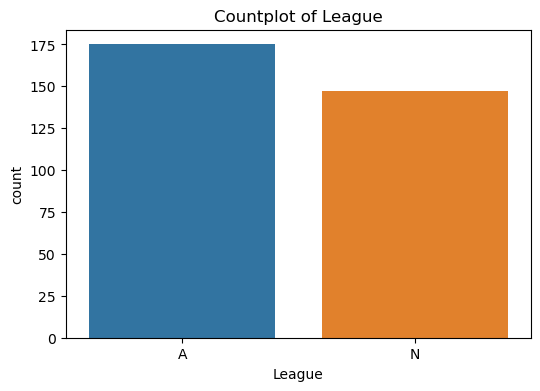

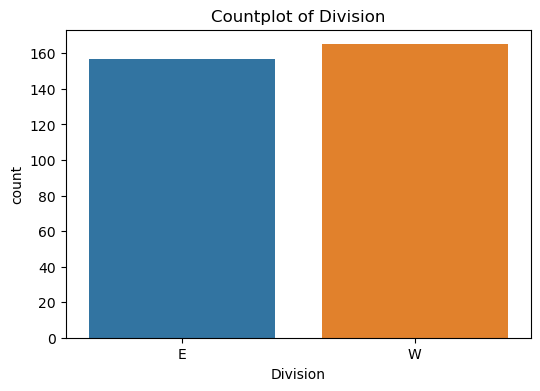

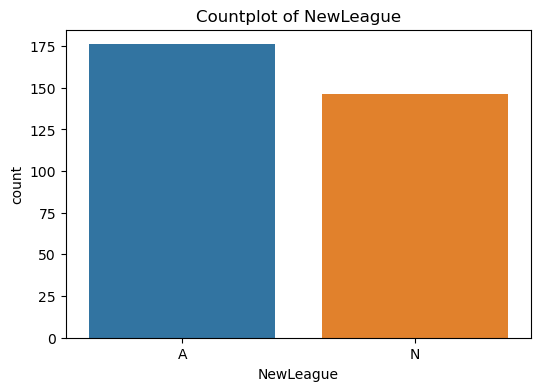

In [9]:
for var in categorical_vars:
    plt.figure(figsize=(6,4))
    sns.countplot(x=var, data=df_hitters)
    plt.title(f'Countplot of {var}')
    plt.show()

**With the League chart we can see that there are more players in League A vs League N. For Division we can see that they are relatively the same with Division E having less players. In NewLeague we can see that it follows the same pattern as League.**

### Creating a distribution plot of all numerical variables and explaining observations

In [10]:
numerical_vars = df_hitters.select_dtypes(include = ["int64", "float64"]).columns
numerical_vars

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary'],
      dtype='object')

In [11]:
num_vars = df_hitters.select_dtypes(include =["int64","float64"])
#num_vars

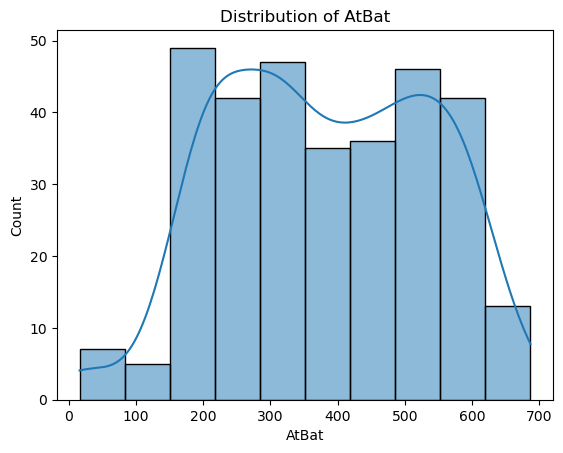

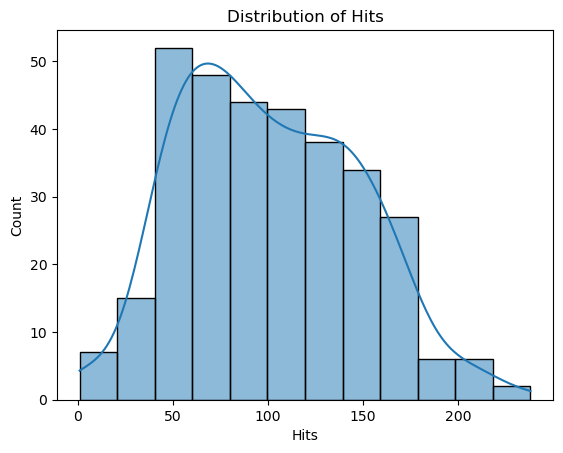

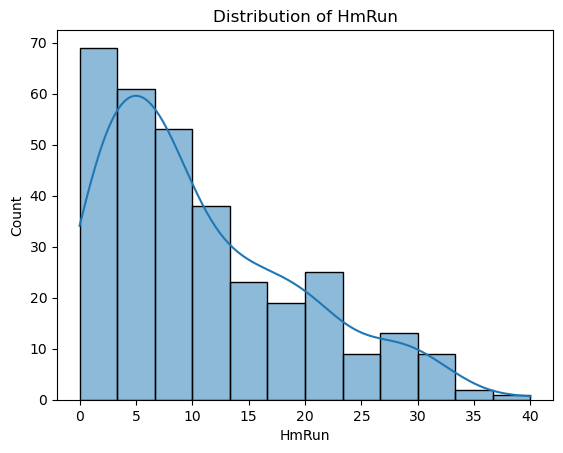

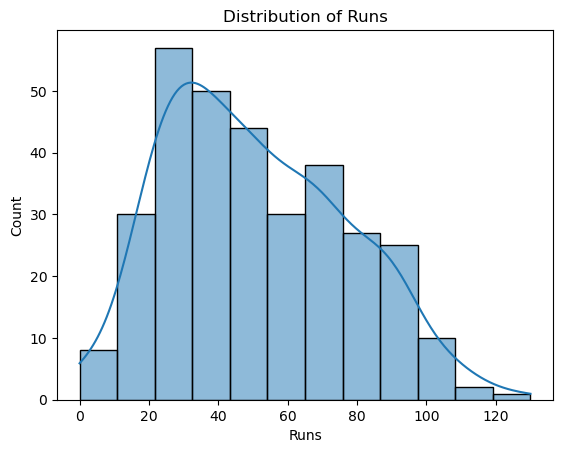

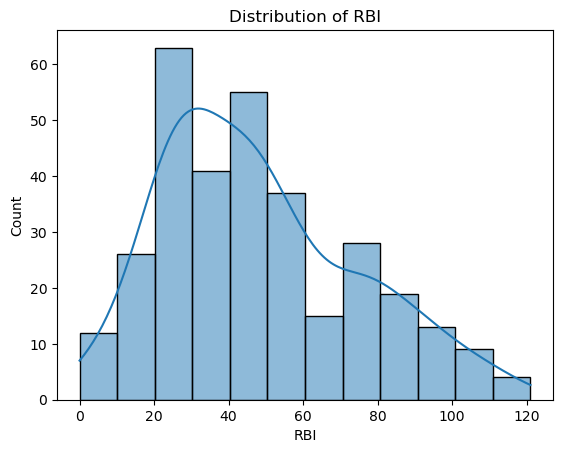

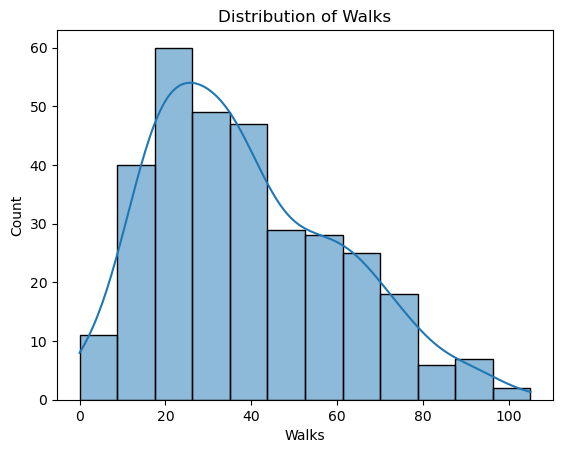

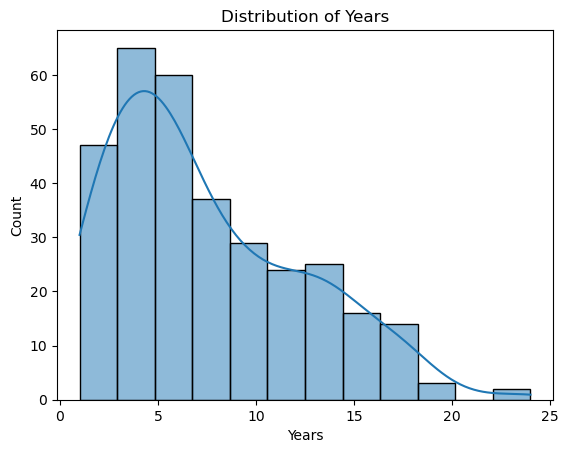

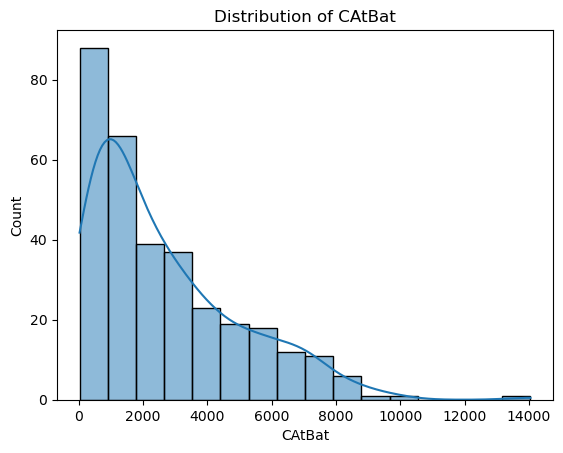

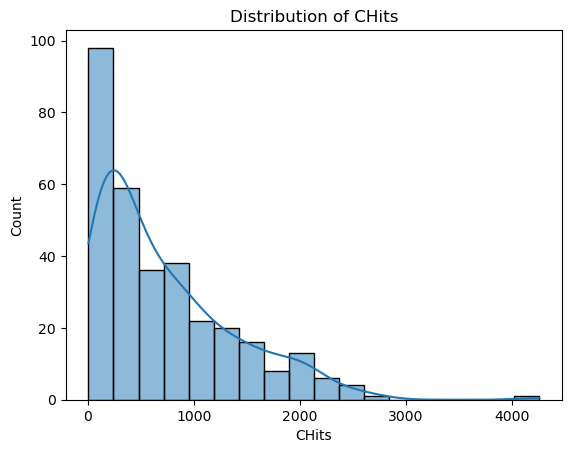

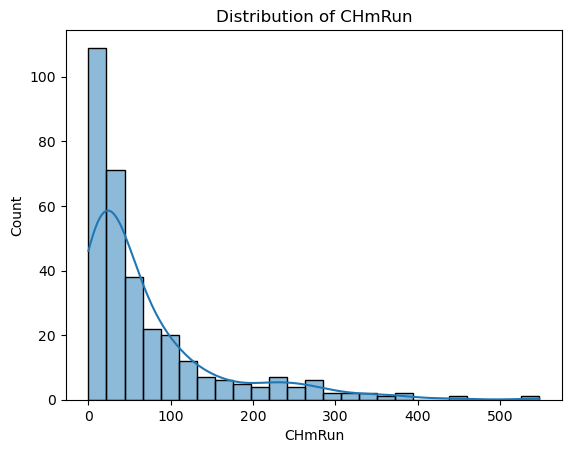

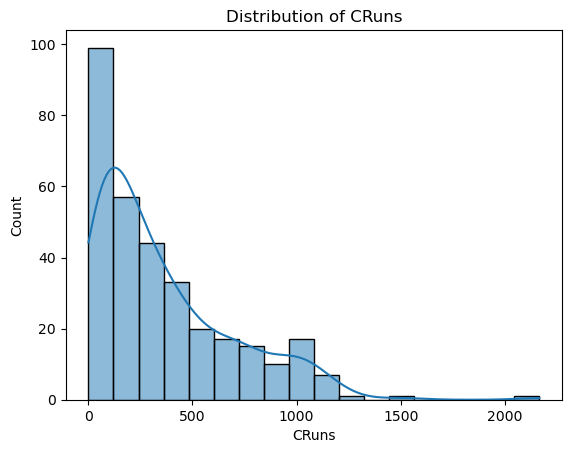

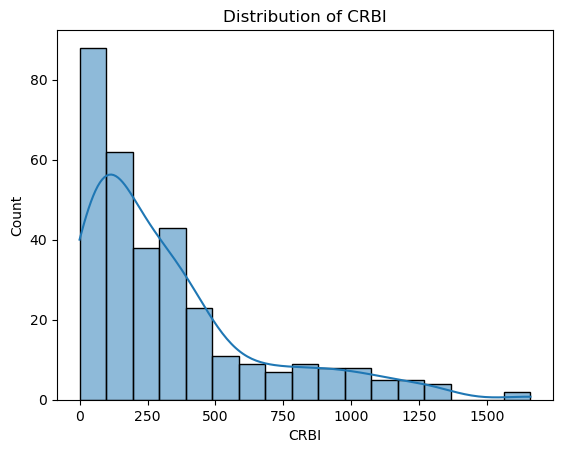

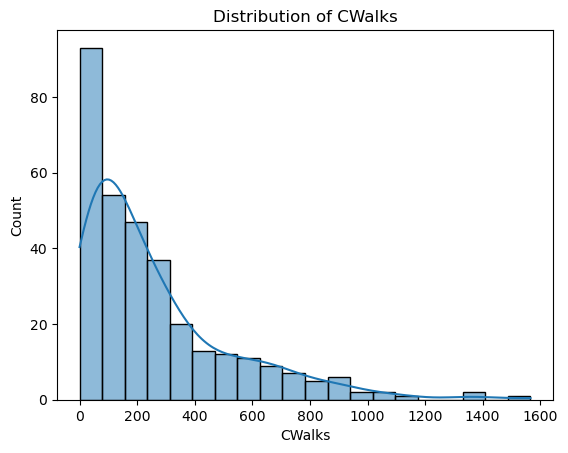

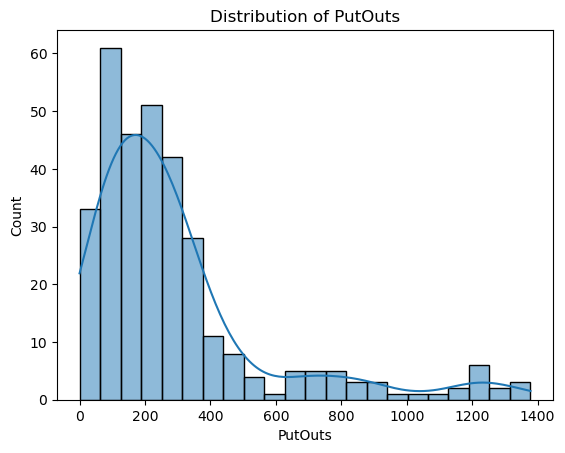

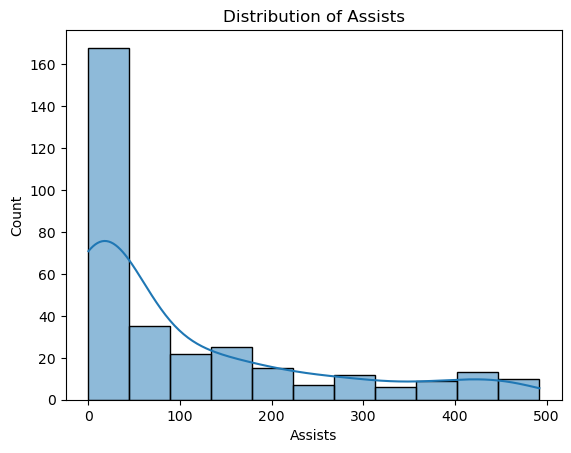

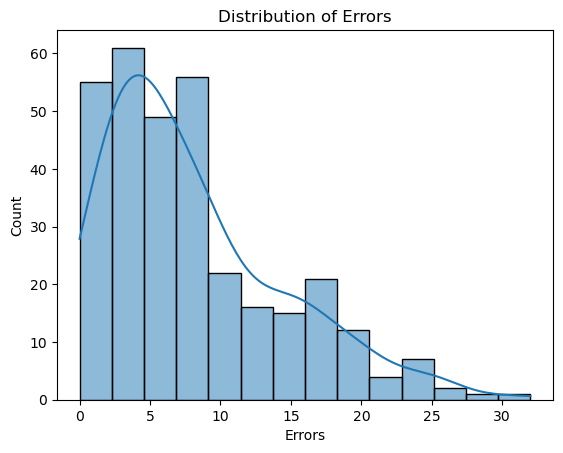

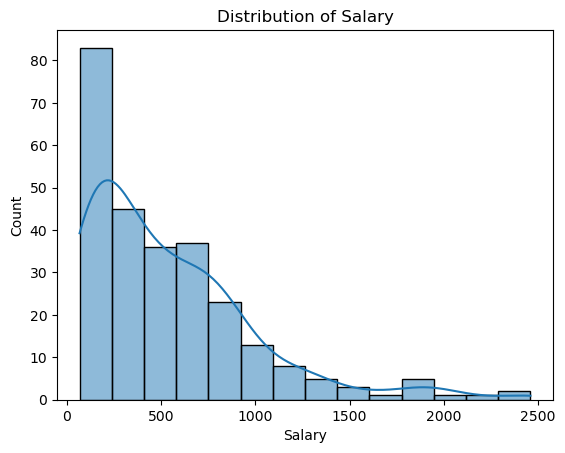

In [12]:
for numv in numerical_vars:
    sns.histplot(df_hitters[numv], kde = True)
    plt.title(f'Distribution of {numv}')
    plt.show()

**Looking at all the distribution plots the majority of them are right skewed. This is reasonable because for example, most players get payed league minimum and only a few players get payed a lot of money, etc. The only plot that is close to relatively normal distribution is the AtBat plot.**

### Creating a comparative boxplot of all the numerical variables and explaining observations

Text(0.5, 1.0, 'Comparative boxplot of Numerivcal Variables')

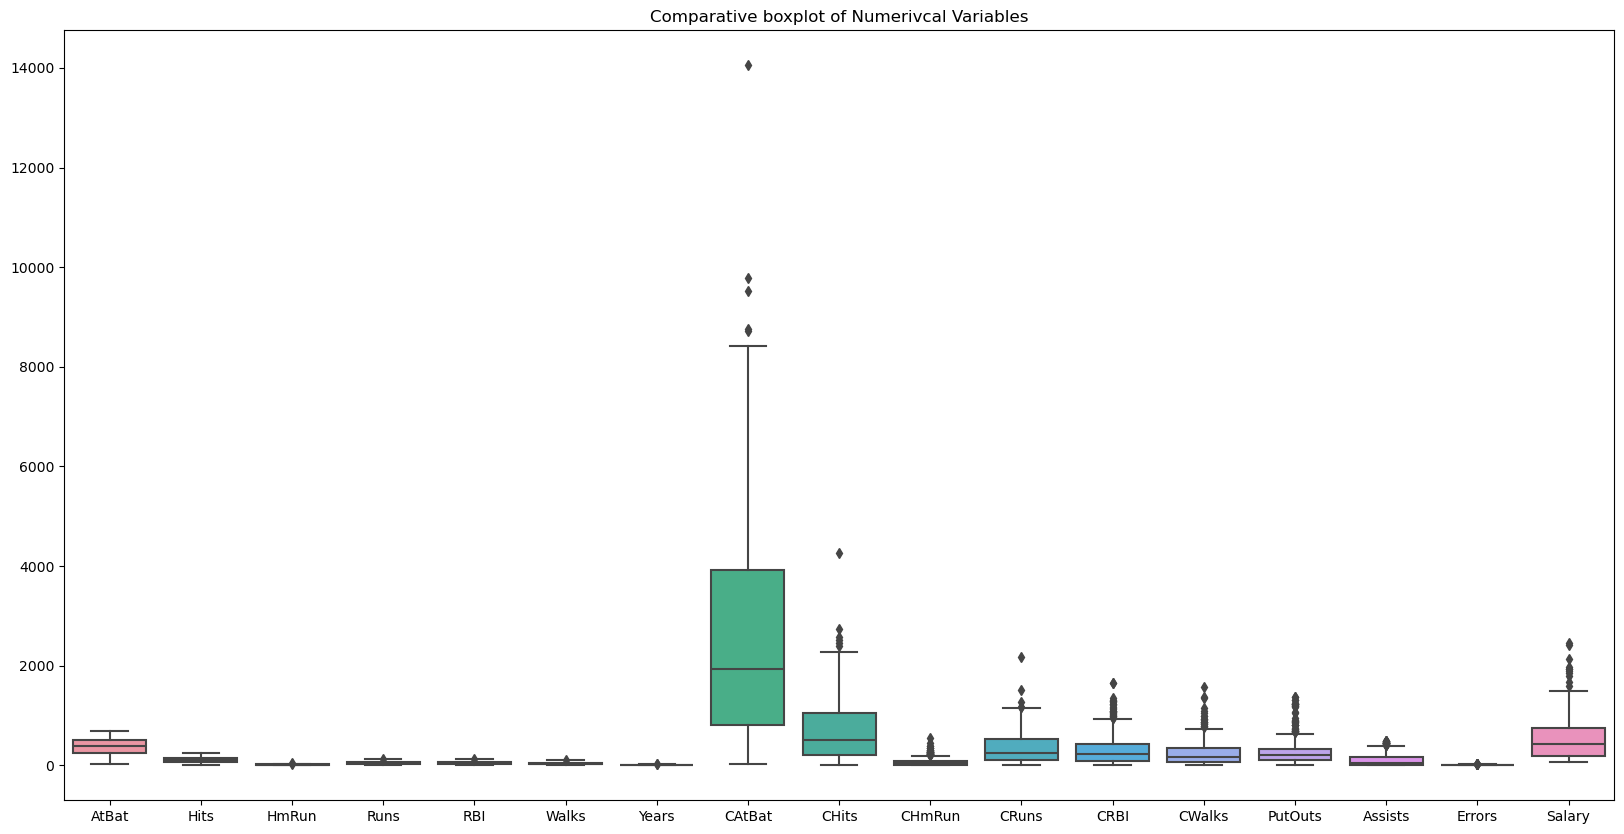

In [13]:
plt.figure(figsize = (20,10))
sns.boxplot(data = num_vars, orient = 'v')
plt.title("Comparative boxplot of Numerivcal Variables")

**We can see that CAtBat has the most variation and this is most likely to the extremely high outliers. We can also see that CAtBat and CHits have an outlier that is way more noticeable than any other. Also most of the outliers are from career stats.**

## Data Exploration

### Statistical Summary of dataset and explaining observations

In [14]:
df_hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


**We can see that AtBat, CAtBat, CHits, CRuns, CRBI, CWalks, PutOuts, Assists and Salary have extremely large standard deviations. Also, notice how some values have very extreme maximum values compared to the 75%. We can see this when looking at CAtBat with a max value of 14053 and the 75% being 3924.25.**

### Number of unique values, most repeated values, and least repeated values

In [15]:
for col in df_hitters.columns:
    print(f"Number of unique values for {col} is {df_hitters[col].nunique()}.")
    print(f"Most repeated value for {col} is {df_hitters[col].value_counts().idxmax()}.")
    print(f"Least repeated value for {col} is {df_hitters[col].value_counts().idxmin()}.\n")

Number of unique values for AtBat is 247.
Most repeated value for AtBat is 209.
Least repeated value for AtBat is 442.

Number of unique values for Hits is 144.
Most repeated value for Hits is 76.
Least repeated value for Hits is 130.

Number of unique values for HmRun is 36.
Most repeated value for HmRun is 4.
Least repeated value for HmRun is 35.

Number of unique values for Runs is 96.
Most repeated value for Runs is 42.
Least repeated value for Runs is 74.

Number of unique values for RBI is 103.
Most repeated value for RBI is 29.
Least repeated value for RBI is 91.

Number of unique values for Walks is 89.
Most repeated value for Walks is 22.
Least repeated value for Walks is 5.

Number of unique values for Years is 22.
Most repeated value for Years is 4.
Least repeated value for Years is 24.

Number of unique values for CAtBat is 314.
Most repeated value for CAtBat is 216.
Least repeated value for CAtBat is 638.

Number of unique values for CHits is 288.
Most repeated value for C

***There are many multiple values that are most repeated and least repeated, so only one value is shown for each.***

### Outliers

*Here I calculate the IQR of all the numerical variables, and outliers are points that fall below the lower bound or above the upper bound. They are calculated by multiplying the IQR by 1.5 and then subtracting for the lower bound and adding for the upper bound.*

In [16]:
print("Outliers:")
for col in numerical_vars:
    Q1 = df_hitters[col].quantile(0.25)
    Q3 = df_hitters[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_hitters[(df_hitters[col] < lower_bound) | (df_hitters[col] > upper_bound)]
    print(f"\nColumn: {col}")
    print(f"Outliers count: {len(outliers)}")

Outliers:

Column: AtBat
Outliers count: 0

Column: Hits
Outliers count: 0

Column: HmRun
Outliers count: 2

Column: Runs
Outliers count: 1

Column: RBI
Outliers count: 1

Column: Walks
Outliers count: 1

Column: Years
Outliers count: 2

Column: CAtBat
Outliers count: 5

Column: CHits
Outliers count: 6

Column: CHmRun
Outliers count: 32

Column: CRuns
Outliers count: 5

Column: CRBI
Outliers count: 26

Column: CWalks
Outliers count: 20

Column: PutOuts
Outliers count: 36

Column: Assists
Outliers count: 23

Column: Errors
Outliers count: 9

Column: Salary
Outliers count: 11


**As we can see we have a lot of outliers in the dataset. With the most being in CRBI, CWalks, PutOuts and Assists**

## Dealing with Missing values

### Checking if Salary column has missing values

In [17]:
df_hitters["Salary"].isnull().sum()

59

**There are 59 missing values for Salary**

*Remembering that the salary distribution was highly skewed we will use the median to impute for the missing values*

### Imputing the median value for salary

In [18]:
salary_median = df_hitters['Salary'].median()
df_hitters['Salary'] = df_hitters['Salary'].fillna(salary_median)

**I filled the null values with the median since if we use the mean it would be slightly skewed due to a few players that get payed significantly more than others.**

### Verifying if the median values were correctly placed for the null values

In [19]:
df_hitters.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

**We can see that we have no missing values**

In [20]:
print(salary_median)
df_hitters.head()

425.0


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,425.0,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


**We found that the median for salary column is 425, and since we know that the first row had a missing value we can confirm that we successfully imputed the median value for the salary column**

## Creating Dummy Variables

### For New League column

In [21]:
NewLeague_dummies = pd.get_dummies(df_hitters['NewLeague'], prefix = "NL")
NewLeague_dummies.sum()

NL_A    176
NL_N    146
dtype: int64

### For League Column

In [22]:
League_dummies = pd.get_dummies(df_hitters['League'], prefix = "L")
League_dummies.sum()

L_A    175
L_N    147
dtype: int64

### For Division Column

In [23]:
Division_dummies = pd.get_dummies(df_hitters['Division'], prefix = "D")
Division_dummies.sum()

D_E    157
D_W    165
dtype: int64

## Merging the data and performing correlation analysis

### Merging dummies to original dataset

In [24]:
df_hitters_merged = pd.concat([df_hitters, NewLeague_dummies, League_dummies, Division_dummies], axis = 1)
df_hitters_merged.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,Assists,Errors,Salary,NewLeague,NL_A,NL_N,L_A,L_N,D_E,D_W
0,293,66,1,30,29,14,1,293,66,1,...,33,20,425.0,A,True,False,True,False,True,False
1,315,81,7,24,38,39,14,3449,835,69,...,43,10,475.0,N,False,True,False,True,False,True
2,479,130,18,66,72,76,3,1624,457,63,...,82,14,480.0,A,True,False,True,False,False,True
3,496,141,20,65,78,37,11,5628,1575,225,...,11,3,500.0,N,False,True,False,True,True,False
4,321,87,10,39,42,30,2,396,101,12,...,40,4,91.5,N,False,True,False,True,True,False


In [25]:
df_hitters_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     322 non-null    float64
 19  NewLeague  322 non-null    object 
 20  NL_A      

**We now have 26 columns**

### Creating a Heatmap

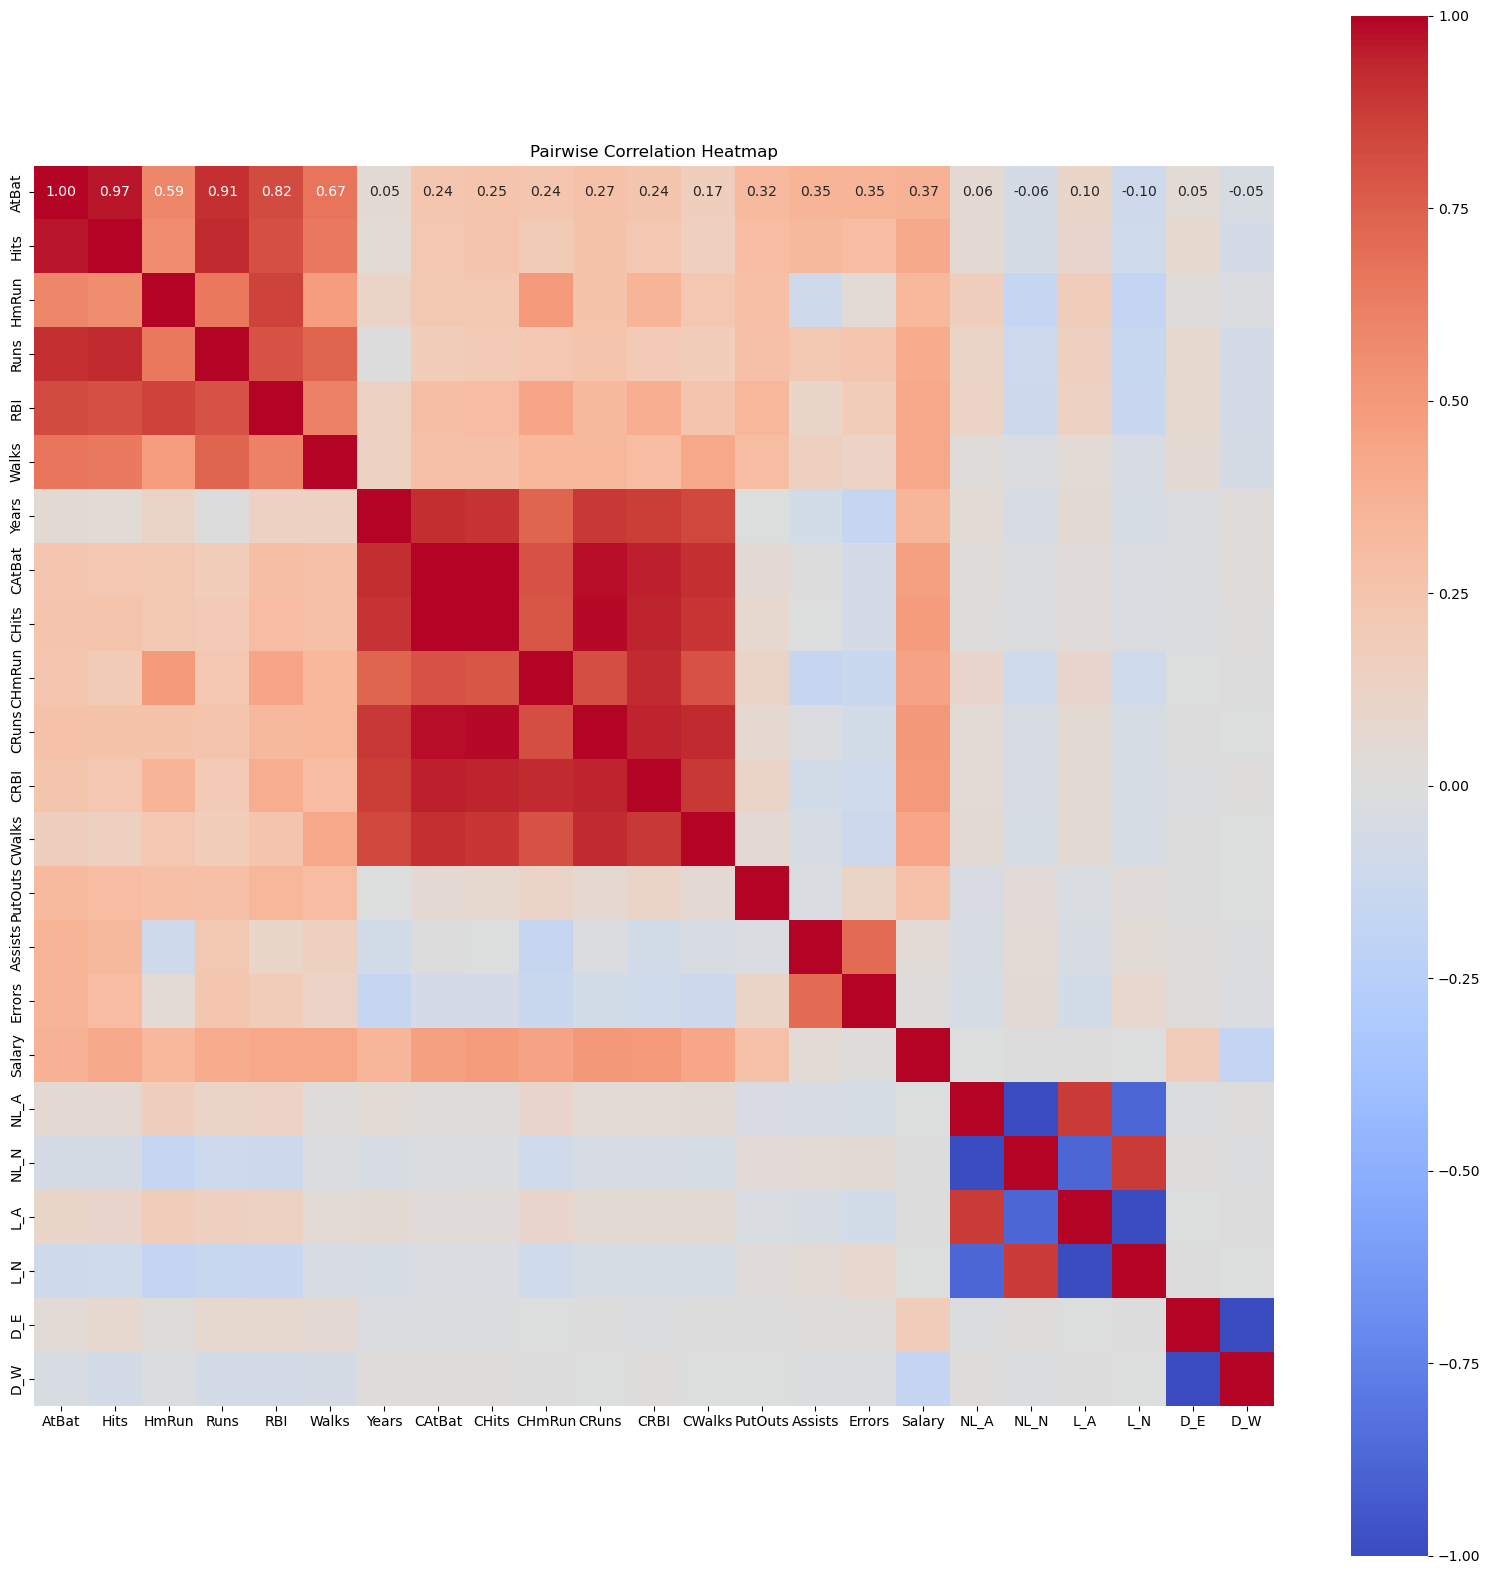

In [26]:
numeric_df = df_hitters_merged.select_dtypes(include=['int64','float64','bool'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Pairwise Correlation Heatmap')
plt.show()

### Identifying correlation coefficients that have a correlation more than 0.8 in absolute value

In [27]:
corr_matrix = numeric_df.corr().abs()
high_corr_pairs = {}
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.8 and corr_matrix.columns[j] != corr_matrix.index[i]:
            high_corr_pairs[(corr_matrix.columns[j], corr_matrix.index[i])] = corr_matrix.iloc[i, j]

for pair, corr_value in high_corr_pairs.items():
    print(f"{pair}: {corr_value}")

('AtBat', 'Hits'): 0.967938822413252
('AtBat', 'Runs'): 0.9130603287774346
('Hits', 'Runs'): 0.922187191158091
('AtBat', 'RBI'): 0.8205392290403626
('Hits', 'RBI'): 0.8110732324123991
('HmRun', 'RBI'): 0.8551222045232474
('Years', 'CAtBat'): 0.9202893608239361
('Years', 'CHits'): 0.9036310571713059
('CAtBat', 'CHits'): 0.9950634819828763
('Years', 'CRuns'): 0.8828769125849802
('CAtBat', 'CRuns'): 0.9833453879950941
('CHits', 'CRuns'): 0.9846088158926343
('CHmRun', 'CRuns'): 0.8202427510303503
('Years', 'CRBI'): 0.8688121361006594
('CAtBat', 'CRBI'): 0.9492187801150668
('CHits', 'CRBI'): 0.9451410160276831
('CHmRun', 'CRBI'): 0.9294837267779029
('CRuns', 'CRBI'): 0.9437690179396472
('Years', 'CWalks'): 0.83853304494422
('CAtBat', 'CWalks'): 0.906500648373304
('CHits', 'CWalks'): 0.8909540398126701
('CRuns', 'CWalks'): 0.9278069248114323
('CRBI', 'CWalks'): 0.8847258206503312
('NL_A', 'NL_N'): 0.9999999999999994
('NL_A', 'L_A'): 0.8810409600123451
('NL_N', 'L_A'): 0.8810409600123449
('NL

### Dropping variables until there is no variable with the pairwise correlation higher than 0.8

In [28]:
variables_to_drop = ['Hits','Runs','RBI','CAtBat','CHits','CRuns','CRBI','CWalks','NL_N','L_A','L_N','D_W']
df_hitters_merged = numeric_df.drop(columns=variables_to_drop)
df_hitters_merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AtBat    322 non-null    int64  
 1   HmRun    322 non-null    int64  
 2   Walks    322 non-null    int64  
 3   Years    322 non-null    int64  
 4   CHmRun   322 non-null    int64  
 5   PutOuts  322 non-null    int64  
 6   Assists  322 non-null    int64  
 7   Errors   322 non-null    int64  
 8   Salary   322 non-null    float64
 9   NL_A     322 non-null    bool   
 10  D_E      322 non-null    bool   
dtypes: bool(2), float64(1), int64(8)
memory usage: 23.4 KB


## Transforming the Data

### Transforming Salary to binary numerical variable

*If the Salary is above the median salary assign the value 1, otherwise assign the value 0.*

In [29]:
df_hitters_merged['Salary'] = (df_hitters_merged["Salary"] > salary_median).astype(int)

### Verifying Data

In [30]:
df_hitters_merged["Salary"].value_counts()

Salary
0    193
1    129
Name: count, dtype: int64

## More visualizations to explore the data

### Visualizing scatterplot of Hits vs. Runs by player in each league. 

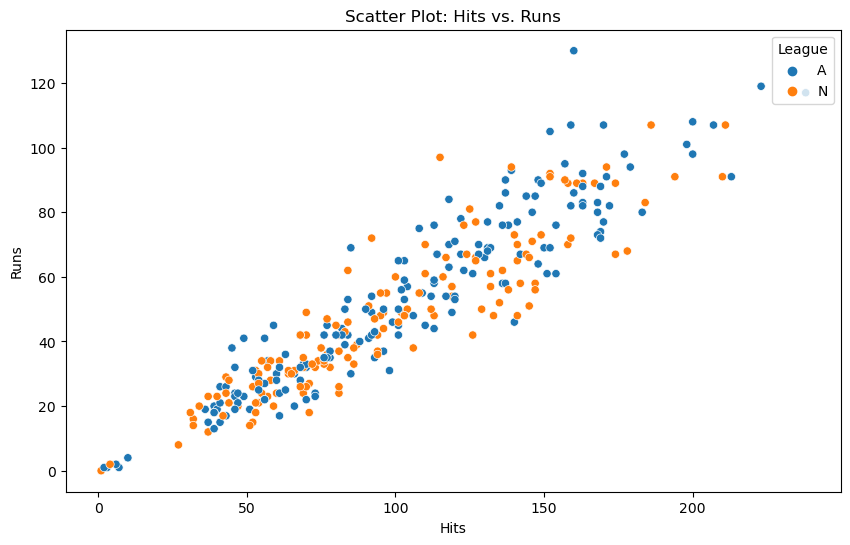

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_hitters, x='Hits', y='Runs', hue='League')
plt.xlabel('Hits')
plt.ylabel('Runs')
plt.title('Scatter Plot: Hits vs. Runs')
plt.legend(title='League', loc='upper right')
plt.show()

**Seeing the high correlation between Hits and Runs I created a scatterplot to see it visually.**

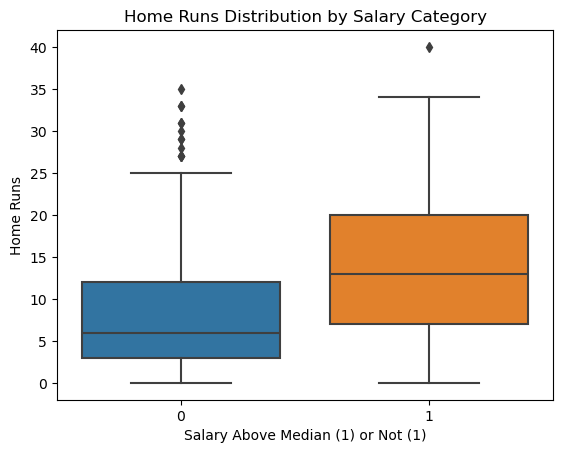

In [34]:
sns.boxplot(x = "Salary", y = "HmRun", data = df_hitters_merged)
plt.title("Home Runs Distribution by Salary Category")
plt.xlabel('Salary Above Median (1) or Not (1)')
plt.ylabel('Home Runs')
plt.show()

**Based on this graph we can see that on average the more homeruns you make the higher ur salary could be. There are a few outliers that make a lot of homeruns but do not get paid above the median salary**

## Creating a new feature

In [33]:
df_hitters_merged['ExperienceLevel'] = pd.cut(df_hitters_merged['Years'], bins=[0, 5, 10, 15, 20, 25], labels=['Rookie', 'Experienced', 'Veteran', 'Expert', 'Legend'])

**There are many things that can be done with this new feature. For example, you can see how many players have a lot of experience and see how their stats, such as homeruns or walks compare with each other. You can also compare each bins with the salary, and may find that players with more experience can have higher salaries.**